Train score: 1.0
Test score: 0.9777777777777777


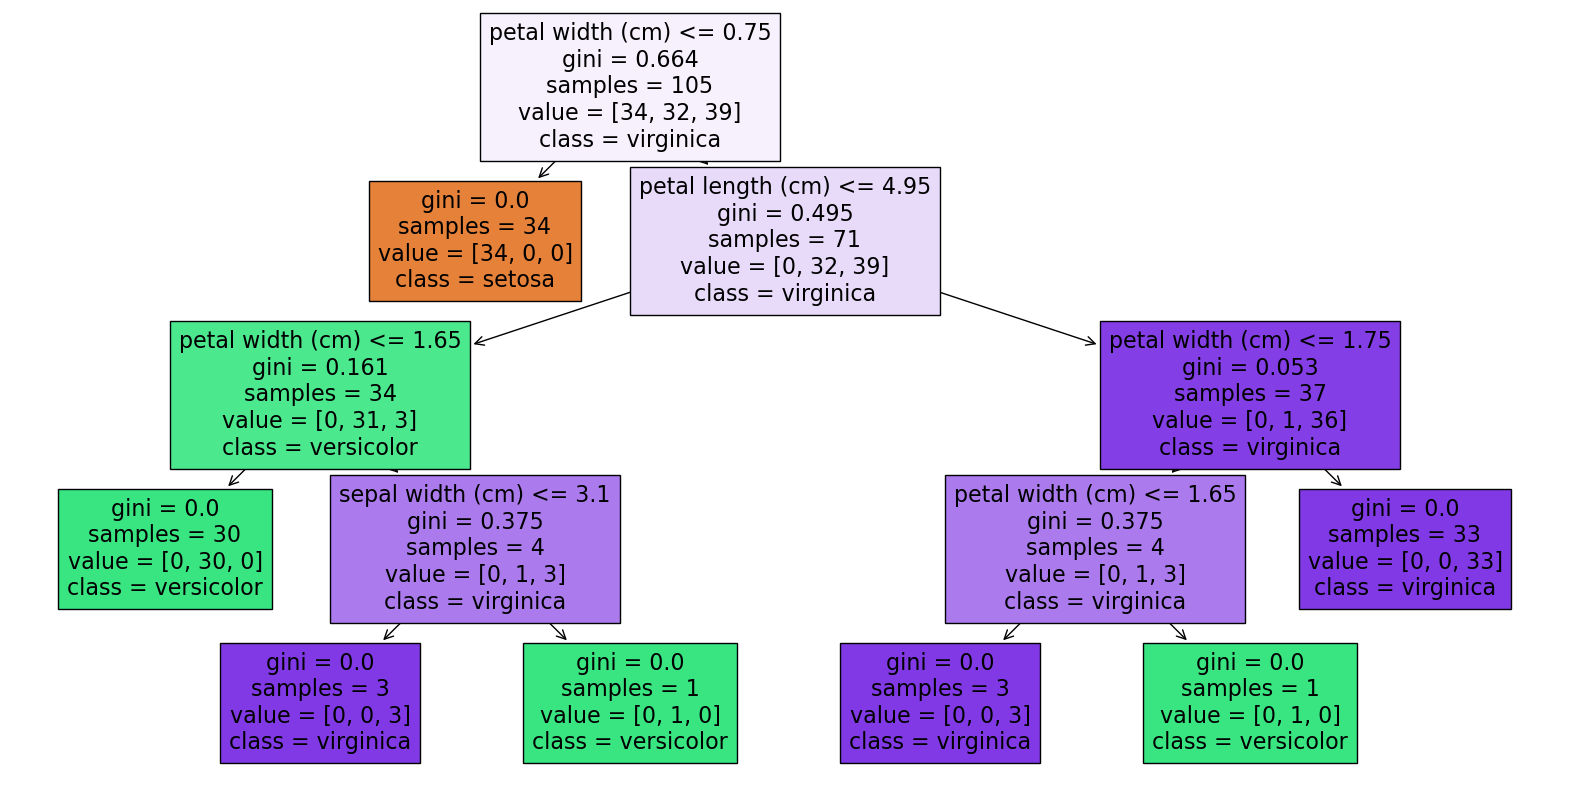

Feature importances:
sepal length (cm): 0.0
sepal width (cm): 0.021504642271982528
petal length (cm): 0.3976695134630798
petal width (cm): 0.5808258442649378

Depth: 1
Train score: 0.6952380952380952
Test score: 0.6


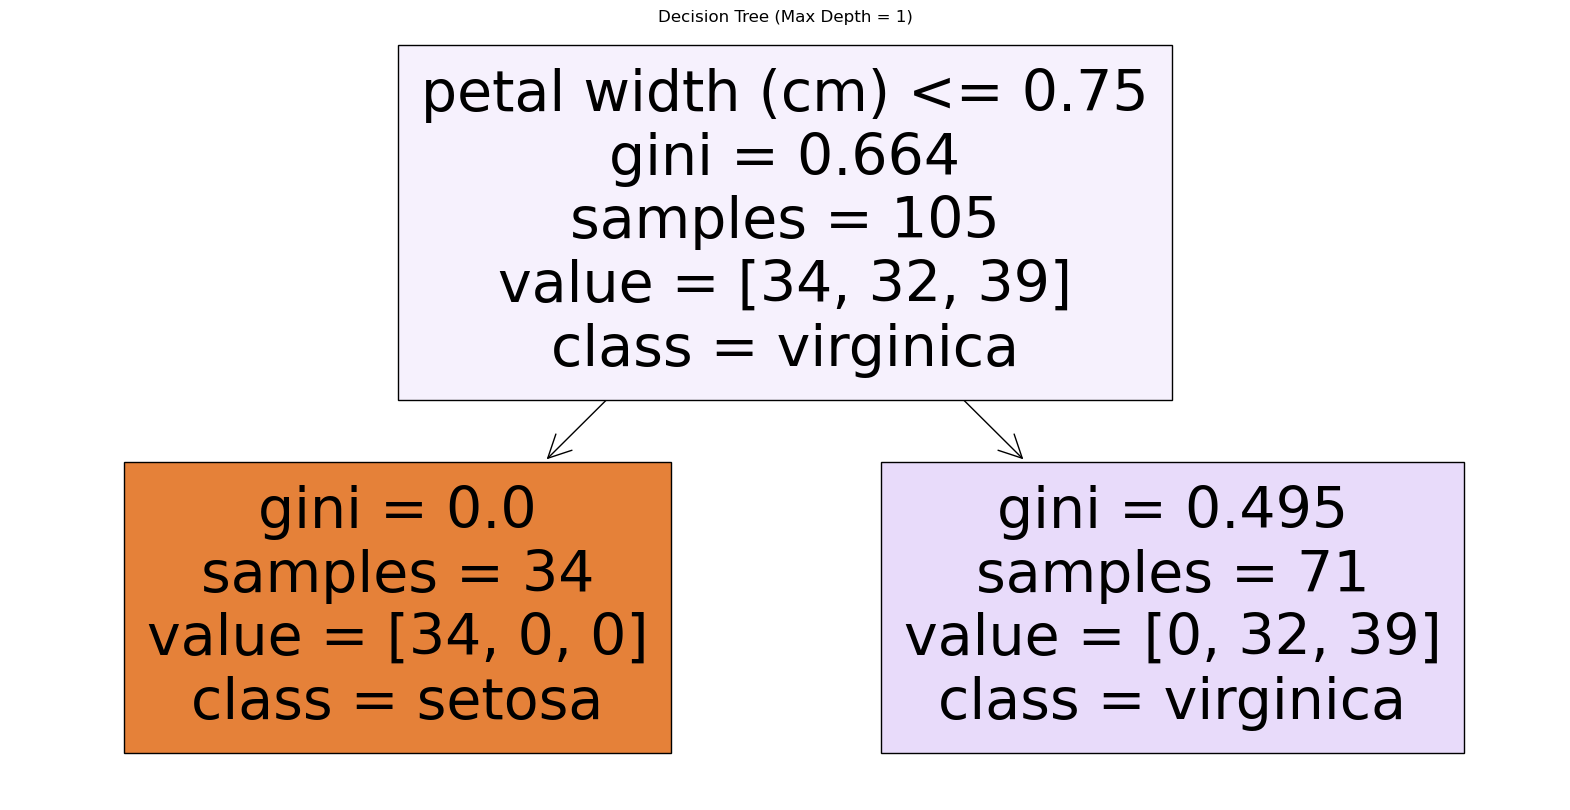

Feature importances:
sepal length (cm): 0.0
sepal width (cm): 0.0
petal length (cm): 0.0
petal width (cm): 1.0

Depth: 2
Train score: 0.9619047619047619
Test score: 0.9111111111111111


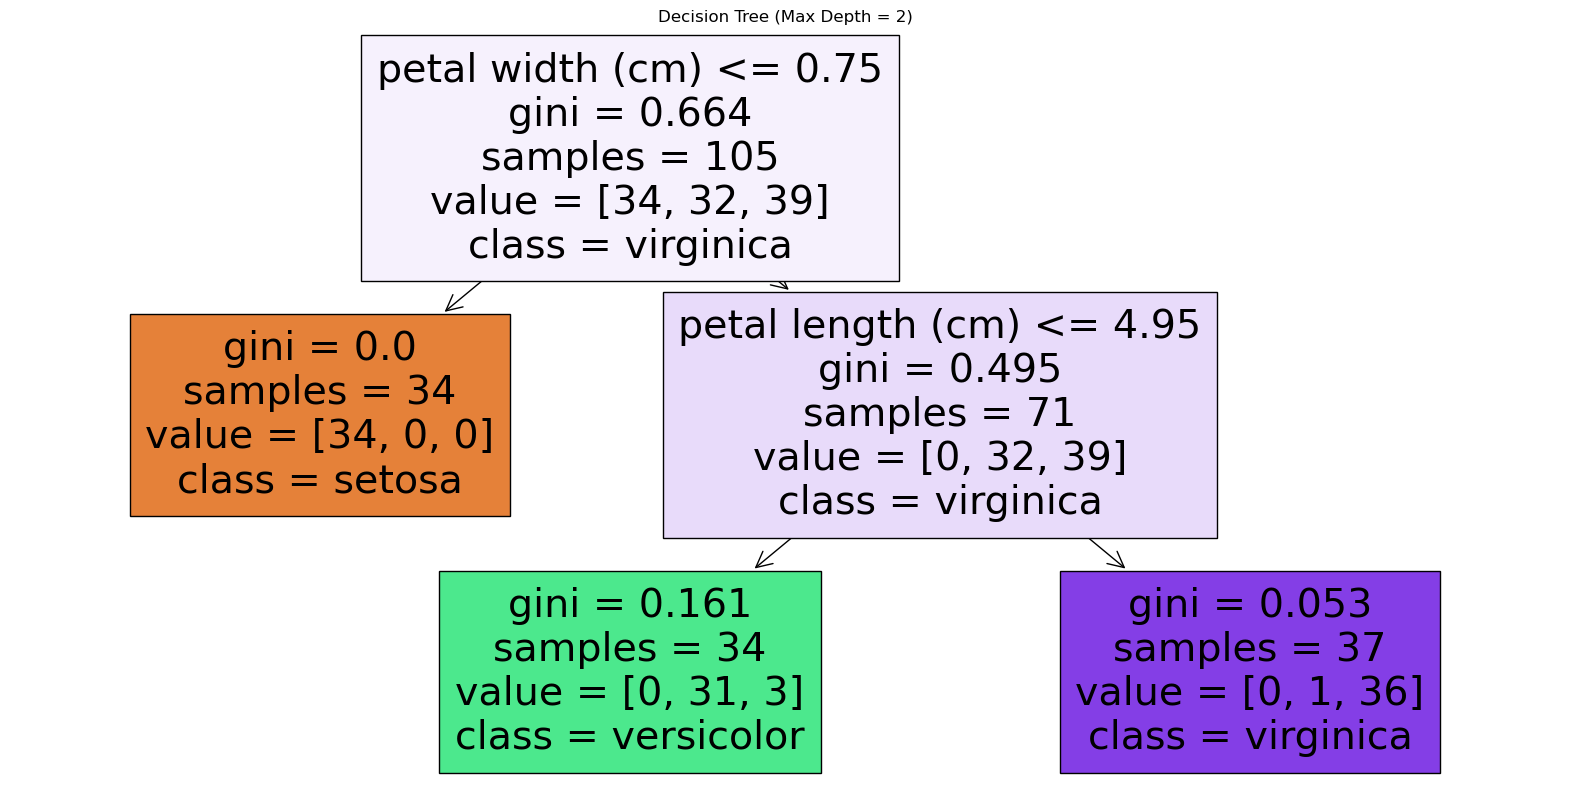

Feature importances:
sepal length (cm): 0.0
sepal width (cm): 0.0
petal length (cm): 0.44498305281811845
petal width (cm): 0.5550169471818814

Depth: 3
Train score: 0.9809523809523809
Test score: 0.9777777777777777


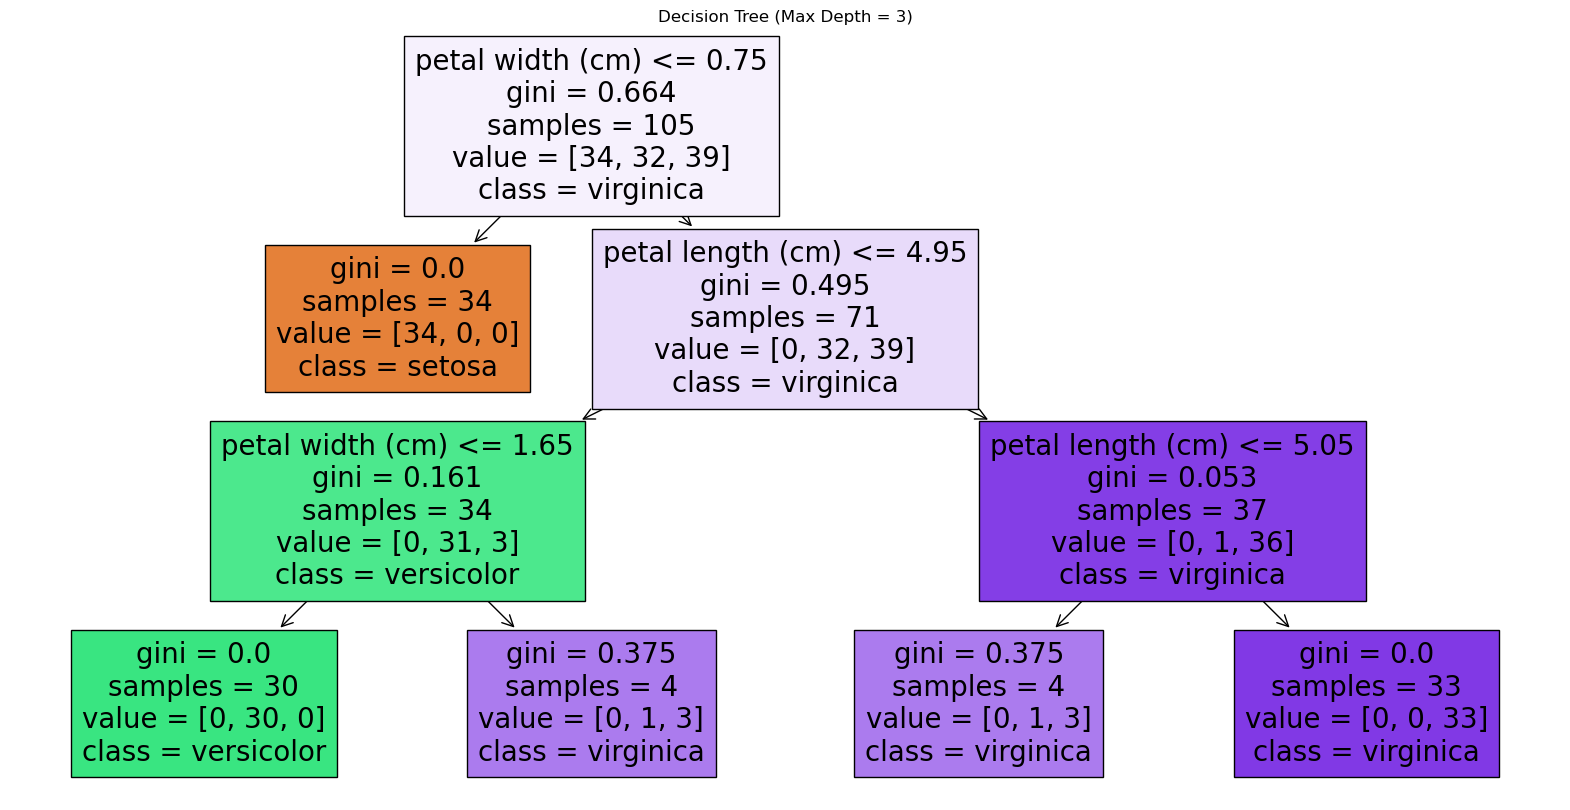

Feature importances:
sepal length (cm): 0.0
sepal width (cm): 0.0
petal length (cm): 0.42222226293735493
petal width (cm): 0.577777737062645

Depth: 4
Train score: 1.0
Test score: 0.9777777777777777


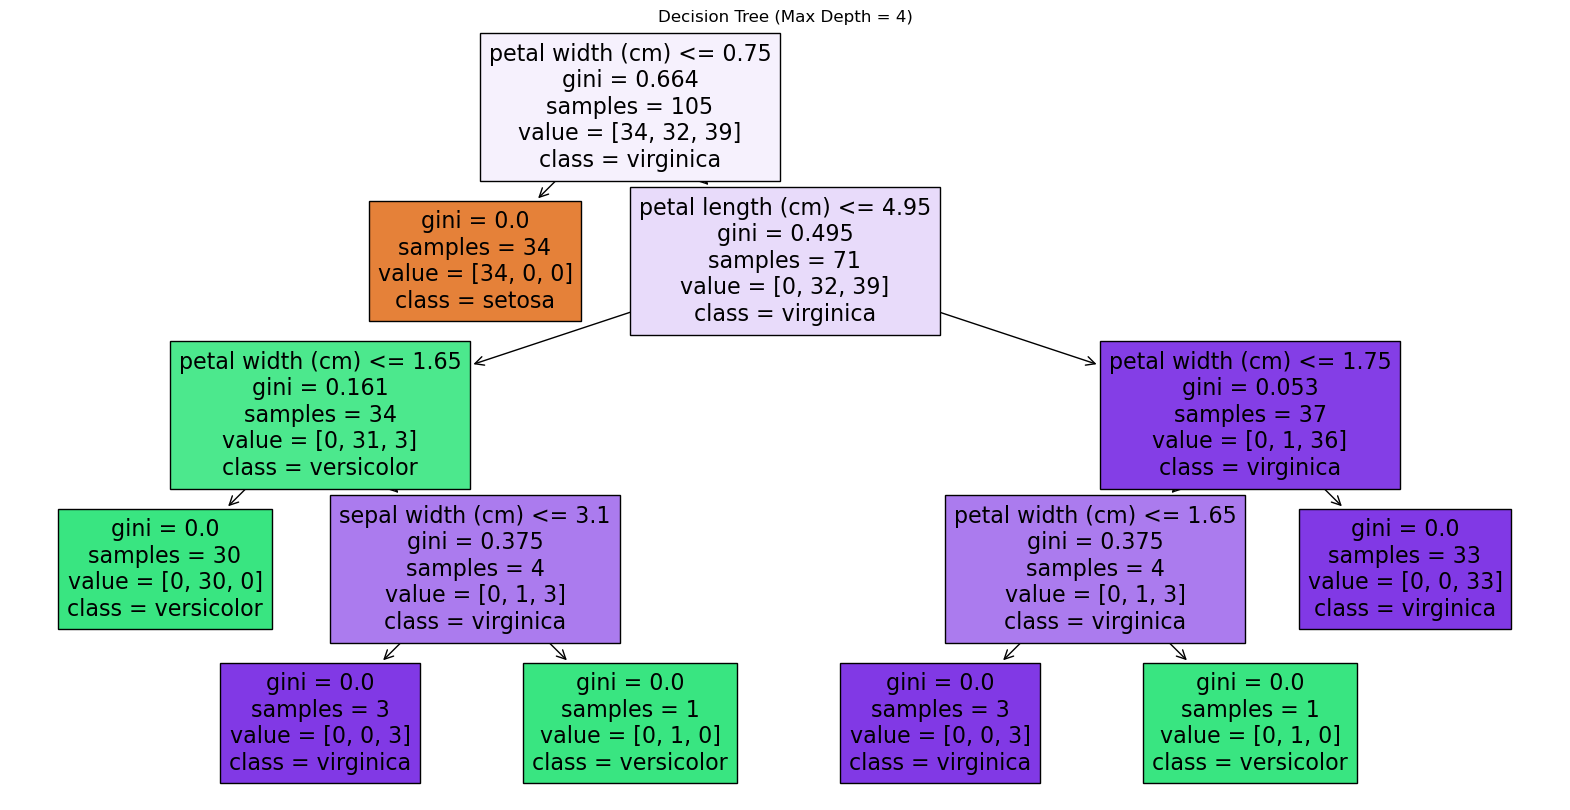

Feature importances:
sepal length (cm): 0.0
sepal width (cm): 0.021504642271982528
petal length (cm): 0.3976695134630798
petal width (cm): 0.5808258442649378


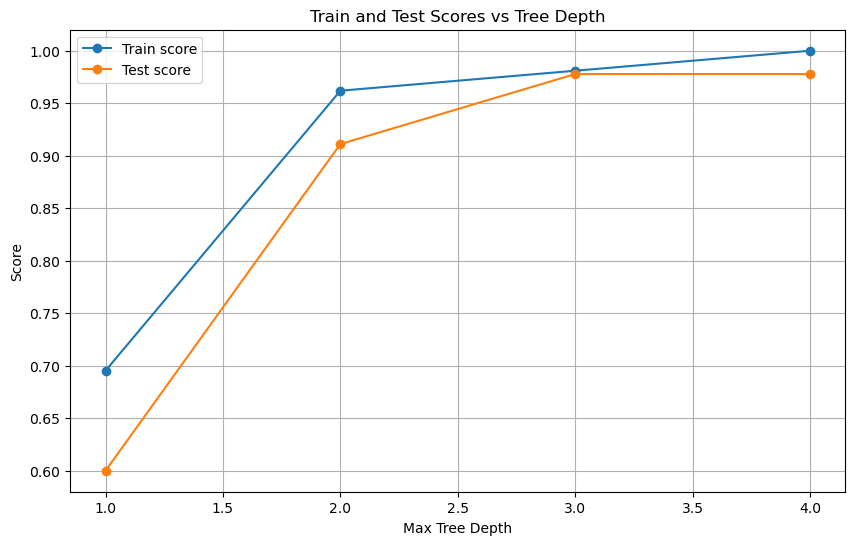

In [3]:
#Question 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,4)
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create and train the decision tree classifier
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

# Calculate the accuracy scores
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

# Print feature importances
print("Feature importances:")
for name, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{name}: {importance}")

# Second code script

# Create and train decision trees with different depths
depths = [1, 2, 3, 4]
train_scores = []
test_scores = []

for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf = clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f"\nDepth: {depth}")
    print(f"Train score: {train_score}")
    print(f"Test score: {test_score}")
    
    plt.figure(figsize=(20,10))
    tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
    plt.title(f"Decision Tree (Max Depth = {depth})")
    plt.show()
    
    print("Feature importances:")
    for name, importance in zip(iris.feature_names, clf.feature_importances_):
        print(f"{name}: {importance}")

# Plot train and test scores vs tree depth
plt.figure(figsize=(10,6))
plt.plot(depths, train_scores, marker='o', label='Train score')
plt.plot(depths, test_scores, marker='o', label='Test score')
plt.xlabel('Max Tree Depth')
plt.ylabel('Score')
plt.title('Train and Test Scores vs Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

Covariance matrix:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

Correlation matrix:
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]

Means:
sepal length (cm): 5.84
sepal width (cm): 3.06
petal length (cm): 3.76
petal width (cm): 1.20

Standard deviations:
sepal length (cm): 0.83
sepal width (cm): 0.43
petal length (cm): 1.76
petal width (cm): 0.76


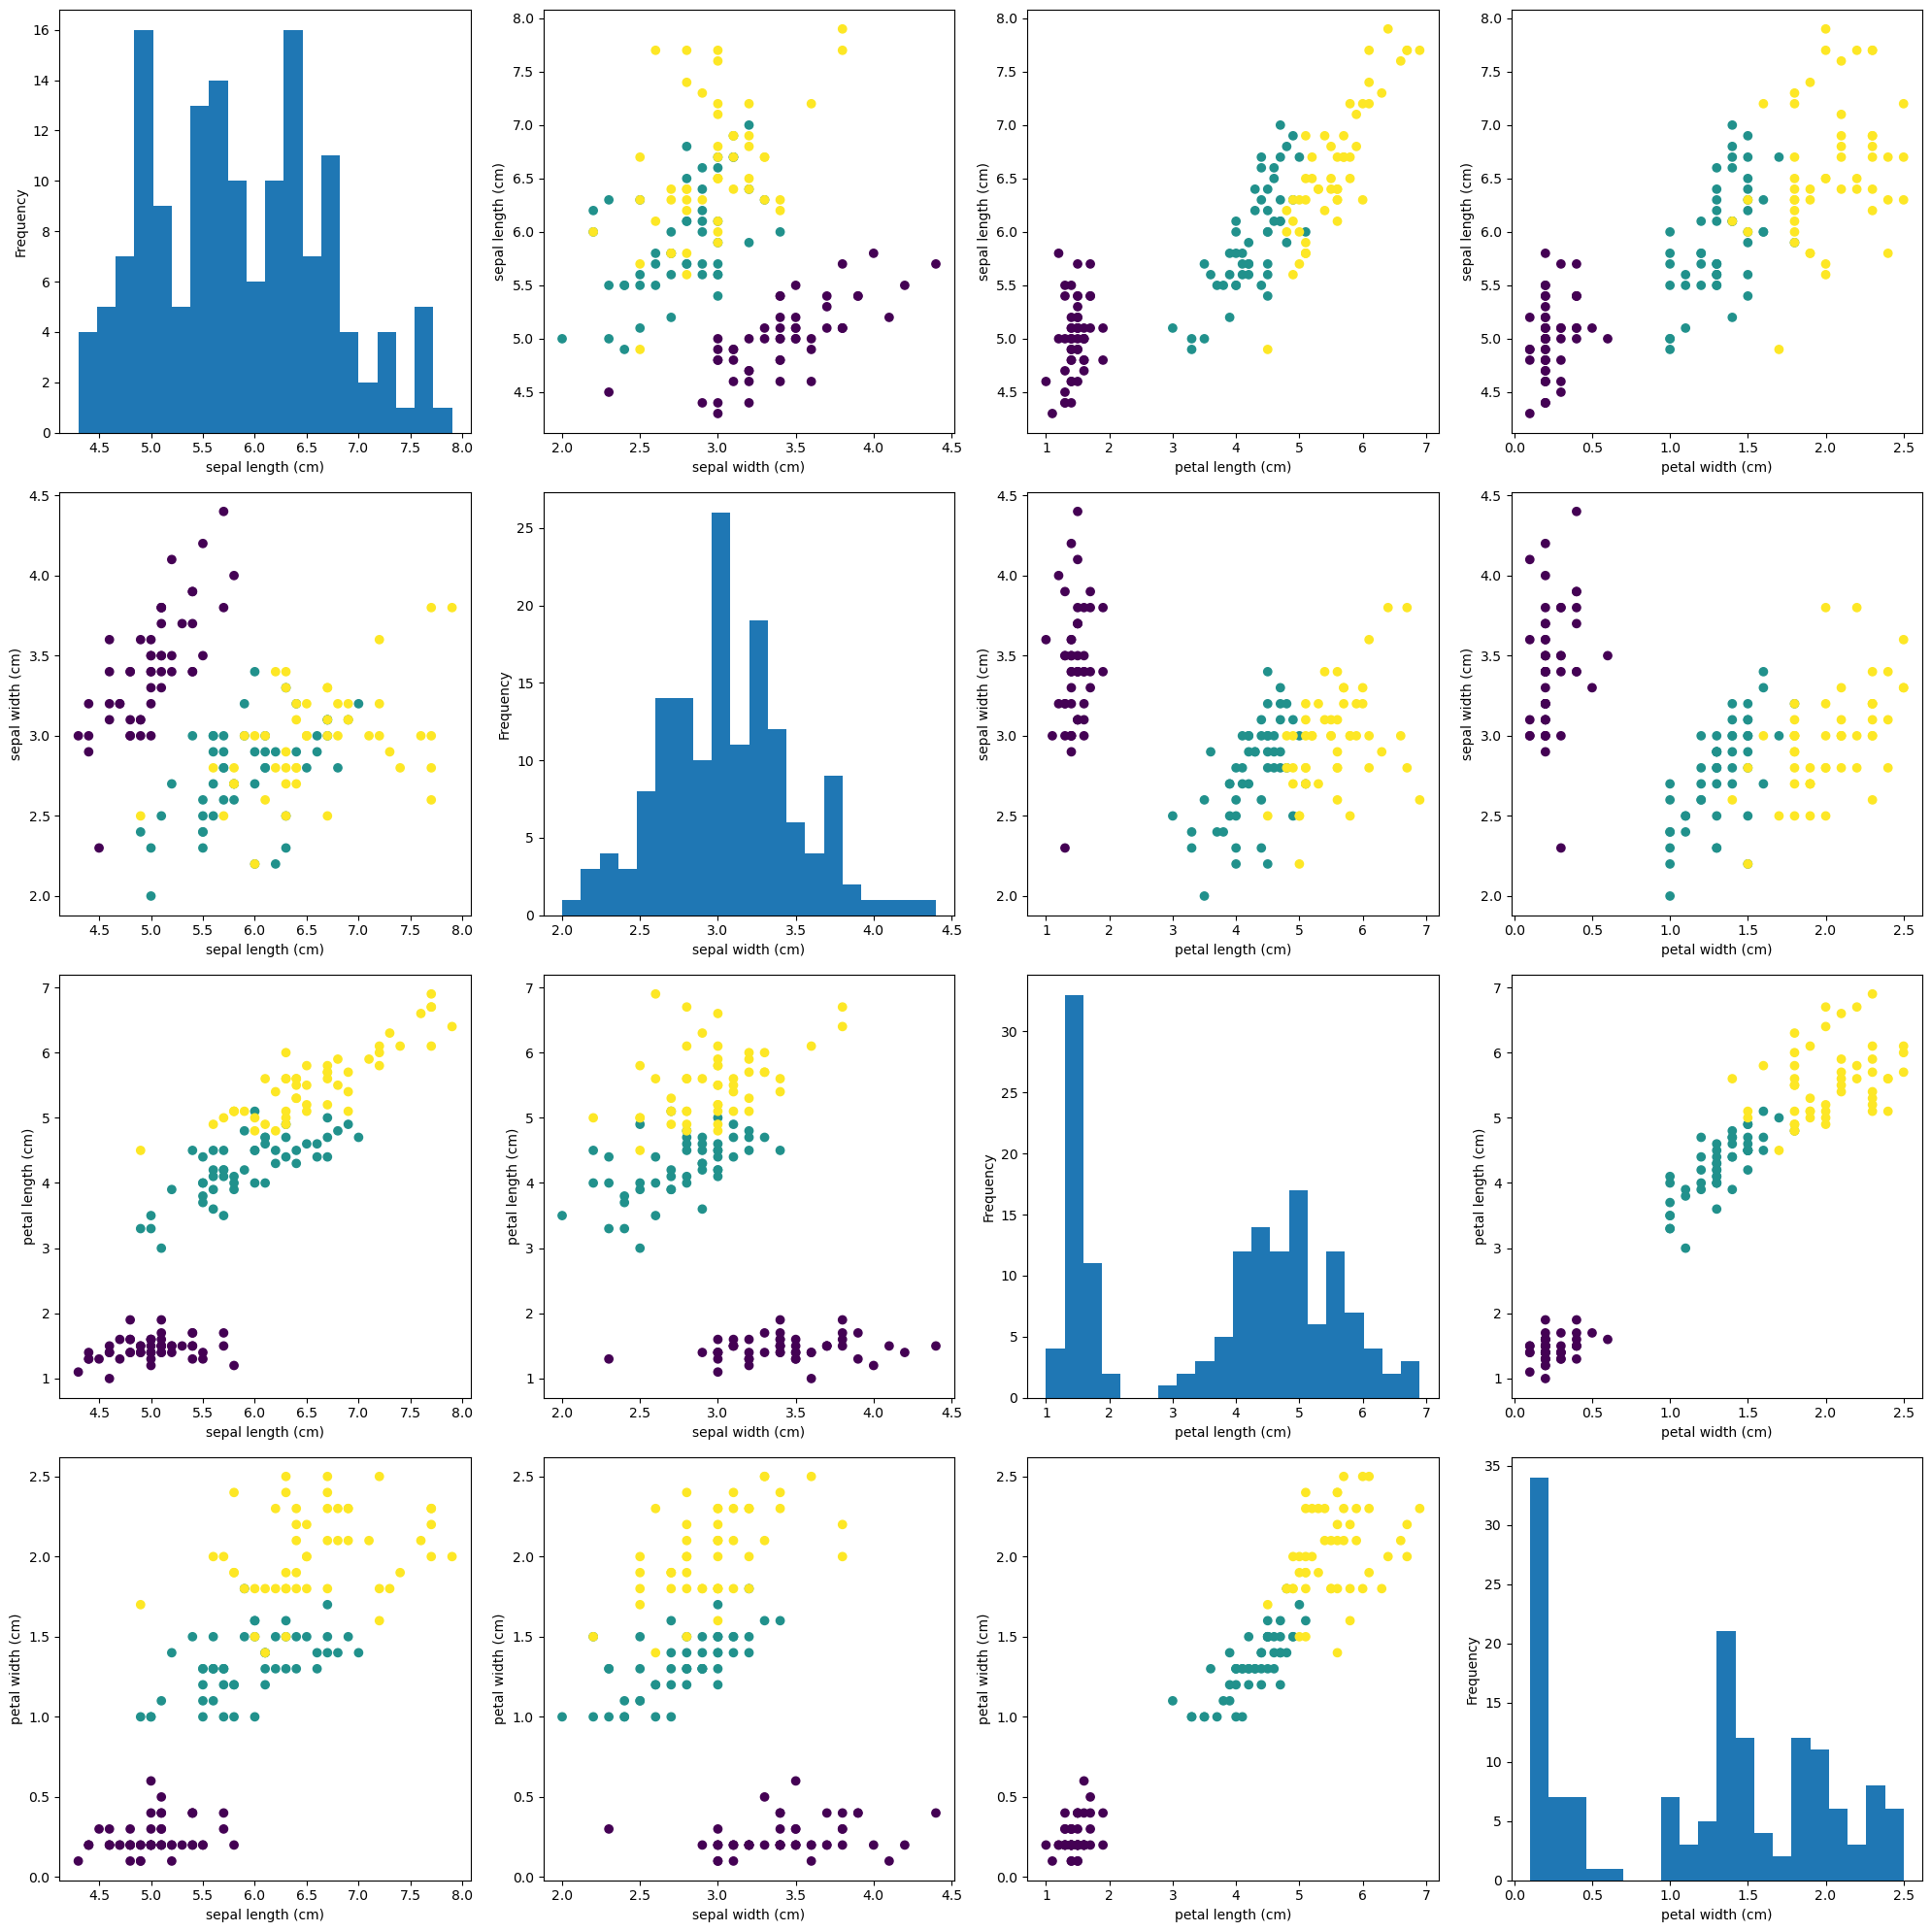

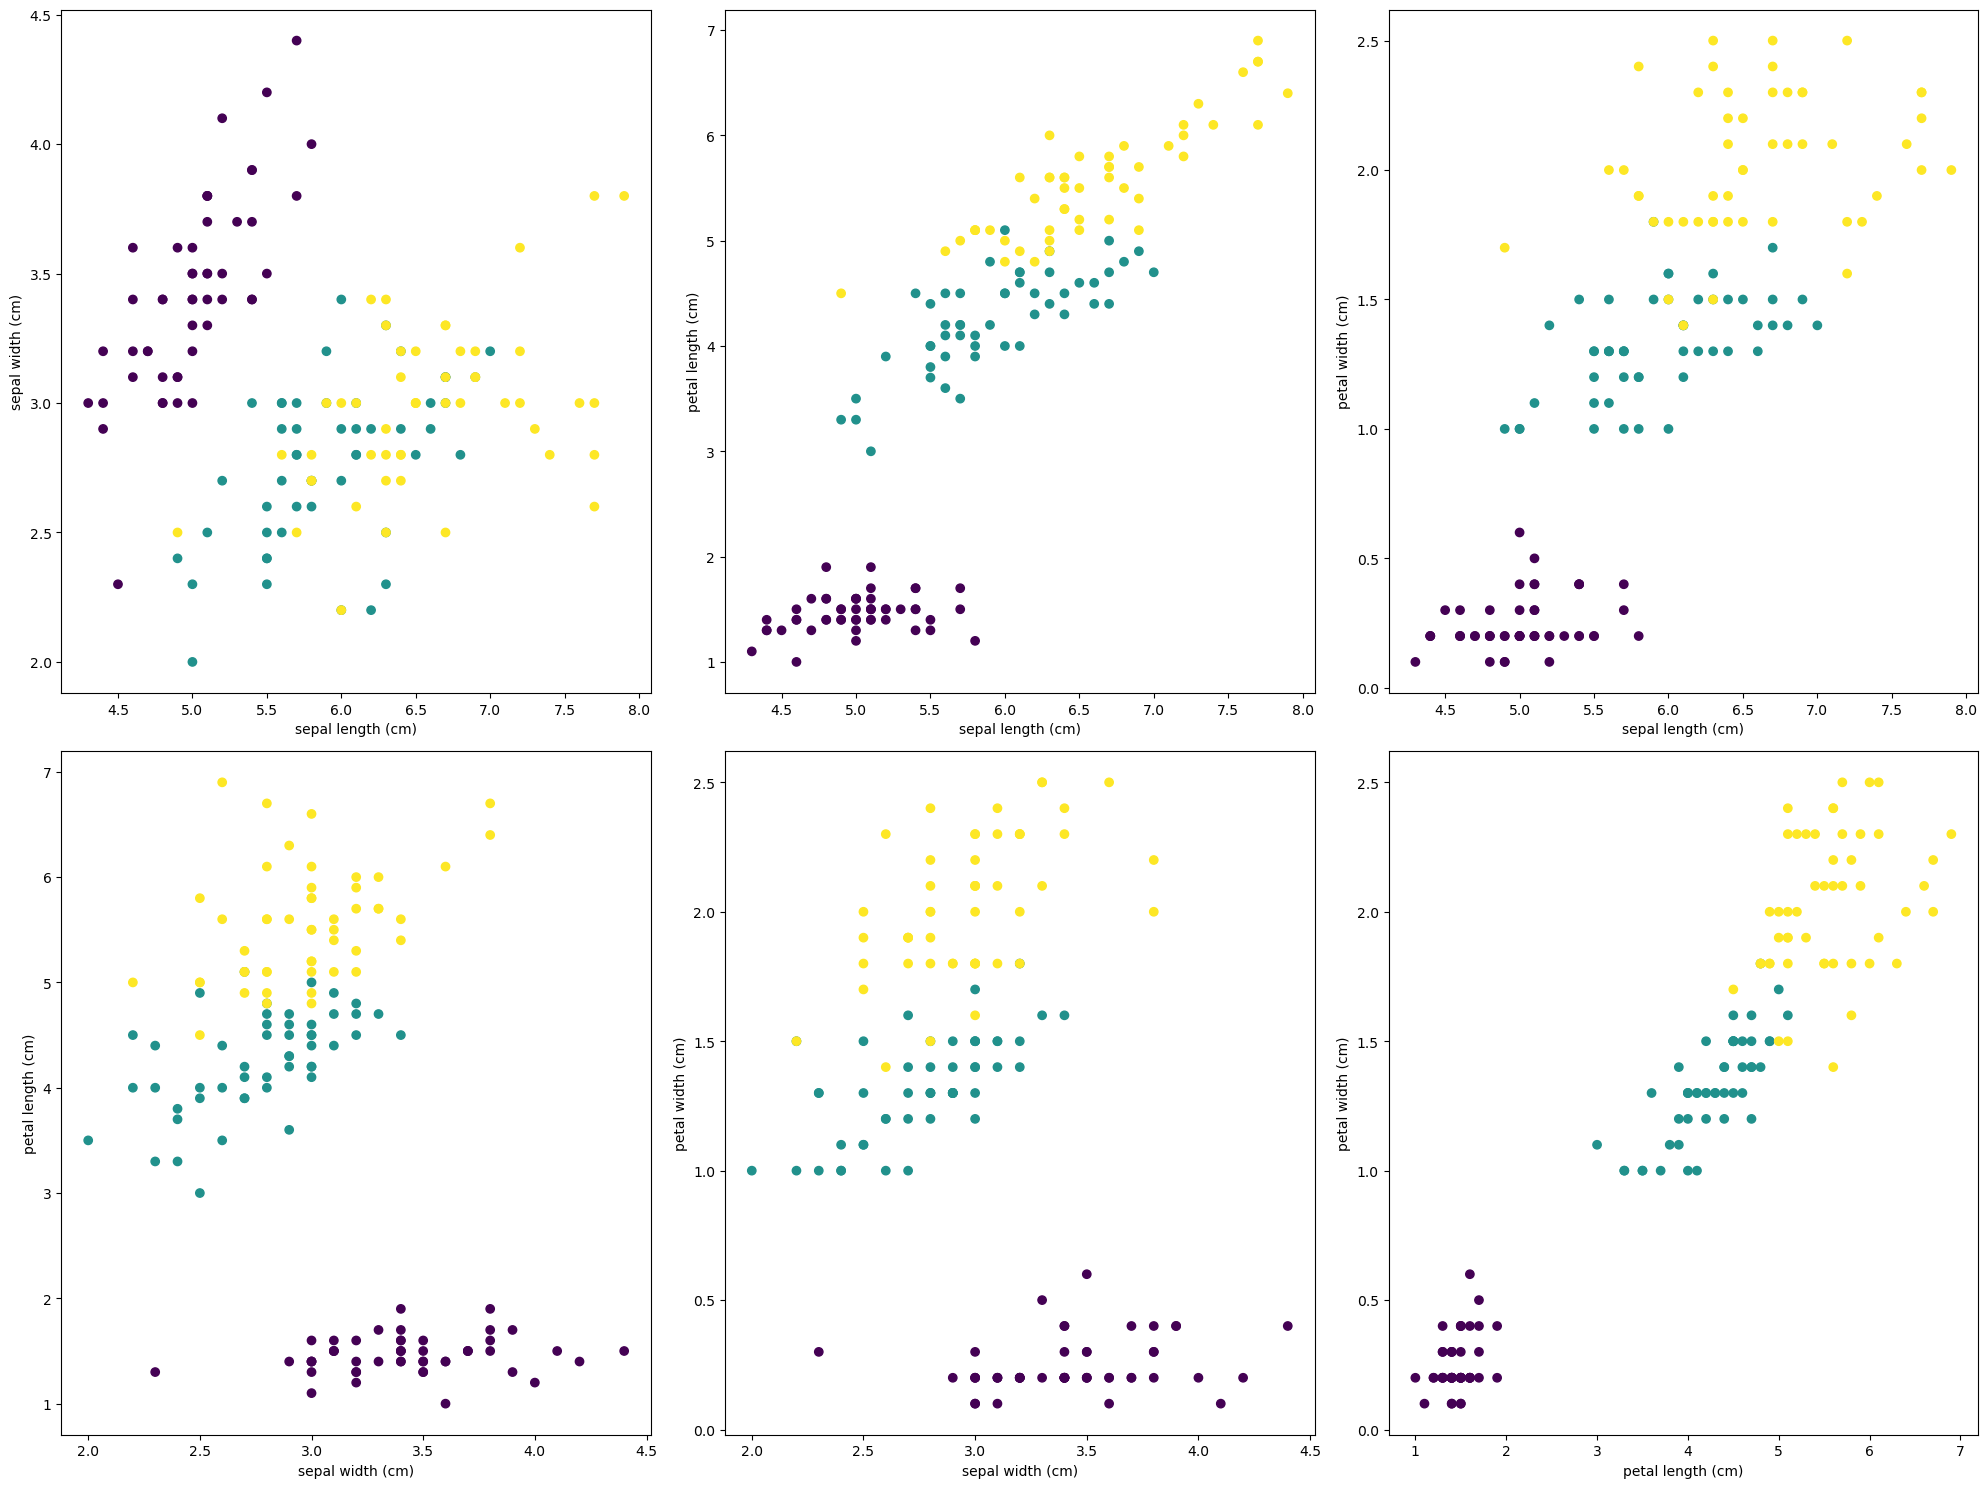

In [8]:
#Question 3
import sklearn.datasets as ds
Bunch = ds.load_iris(return_X_y=False)

# Covariance and correlation matrices
cov_matrix = np.cov(Bunch.data.T)
corr_matrix = np.corrcoef(Bunch.data.T)

print("Covariance matrix:")
print(cov_matrix)
print("\nCorrelation matrix:")
print(corr_matrix)

# Means and standard deviations
means = np.mean(Bunch.data, axis=0)
stds = np.std(Bunch.data, axis=0)

print("\nMeans:")
for i, feature in enumerate(Bunch.feature_names):
    print(f"{feature}: {means[i]:.2f}")

print("\nStandard deviations:")
for i, feature in enumerate(Bunch.feature_names):
    print(f"{feature}: {stds[i]:.2f}")

# 2D scatter plots for all pairs of features
n_features = len(Bunch.feature_names)
fig, axes = plt.subplots(n_features, n_features, figsize=(20, 20))

for i in range(n_features):
    for j in range(n_features):
        if i != j:
            axes[i, j].scatter(Bunch.data[:, j], Bunch.data[:, i], c=Bunch.target, cmap='viridis')
            axes[i, j].set_xlabel(Bunch.feature_names[j])
            axes[i, j].set_ylabel(Bunch.feature_names[i])
        else:
            axes[i, j].hist(Bunch.data[:, i], bins=20)
            axes[i, j].set_xlabel(Bunch.feature_names[i])
            axes[i, j].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2D scatter plots with different colors for each Iris species
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.ravel()

plot_idx = 0
for i in range(n_features):
    for j in range(i+1, n_features):
        axes[plot_idx].scatter(Bunch.data[:, i], Bunch.data[:, j], c=Bunch.target, cmap='viridis')
        axes[plot_idx].set_xlabel(Bunch.feature_names[i])
        axes[plot_idx].set_ylabel(Bunch.feature_names[j])
        plot_idx += 1

plt.tight_layout()
plt.show()

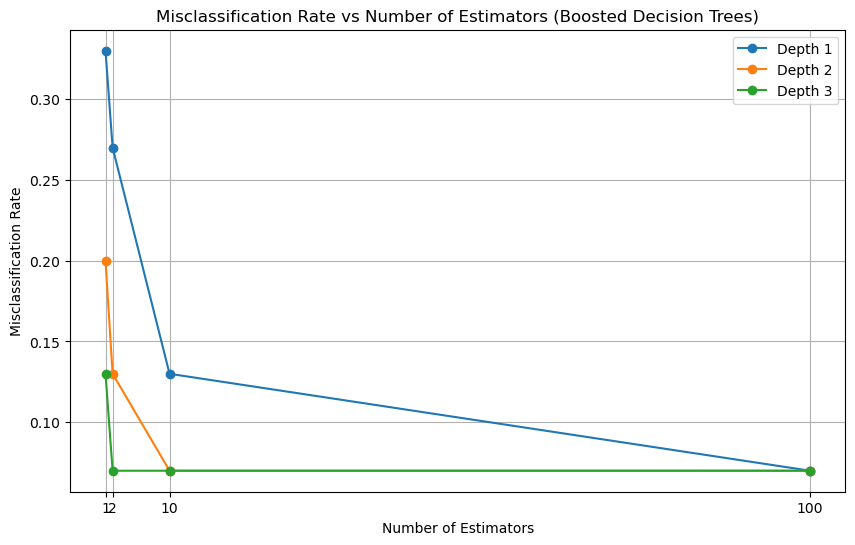

In [1]:
import matplotlib.pyplot as plt

# Data for misclassification rates
estimators = [1, 2, 10, 100]
depth_1 = [0.33, 0.27, 0.13, 0.07]
depth_2 = [0.20, 0.13, 0.07, 0.07]
depth_3 = [0.13, 0.07, 0.07, 0.07]

# Plot the misclassification trends
plt.figure(figsize=(10, 6))
plt.plot(estimators, depth_1, marker='o', label='Depth 1')
plt.plot(estimators, depth_2, marker='o', label='Depth 2')
plt.plot(estimators, depth_3, marker='o', label='Depth 3')

# Add labels and title
plt.title("Misclassification Rate vs Number of Estimators (Boosted Decision Trees)")
plt.xlabel("Number of Estimators")
plt.ylabel("Misclassification Rate")
plt.xticks(estimators)
plt.legend()
plt.grid()

# Show the graph
plt.show()